In [1]:
library(dplyr)
library(tidyr)
library(lubridate)
library(caret)
library(randomForest)
library(ggplot2)

Warning message:
"package 'dplyr' was built under R version 4.3.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'lubridate' was built under R version 4.3.3"

Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Warning message:
"package 'caret' was built under R version 4.3.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.3.3"
Loading required package: lattice

Warning message:
"package 'randomForest' was built under R version 4.3.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:dplyr':

    combine




In [2]:
sales_df <-read.csv("kc_house_data.csv")

In [3]:
head(sales_df)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
,<dbl>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,⋯,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,⋯,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,⋯,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,⋯,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,⋯,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,⋯,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [4]:
summary(sales_df)

       id                date               price            bedrooms     
 Min.   :1.000e+06   Length:21613       Min.   :  75000   Min.   : 0.000  
 1st Qu.:2.123e+09   Class :character   1st Qu.: 321950   1st Qu.: 3.000  
 Median :3.905e+09   Mode  :character   Median : 450000   Median : 3.000  
 Mean   :4.580e+09                      Mean   : 540088   Mean   : 3.371  
 3rd Qu.:7.309e+09                      3rd Qu.: 645000   3rd Qu.: 4.000  
 Max.   :9.900e+09                      Max.   :7700000   Max.   :33.000  
   bathrooms      sqft_living       sqft_lot           floors     
 Min.   :0.000   Min.   :  290   Min.   :    520   Min.   :1.000  
 1st Qu.:1.750   1st Qu.: 1427   1st Qu.:   5040   1st Qu.:1.000  
 Median :2.250   Median : 1910   Median :   7618   Median :1.500  
 Mean   :2.115   Mean   : 2080   Mean   :  15107   Mean   :1.494  
 3rd Qu.:2.500   3rd Qu.: 2550   3rd Qu.:  10688   3rd Qu.:2.000  
 Max.   :8.000   Max.   :13540   Max.   :1651359   Max.   :3.500  
   wat

In [5]:
# checking each variable one by one

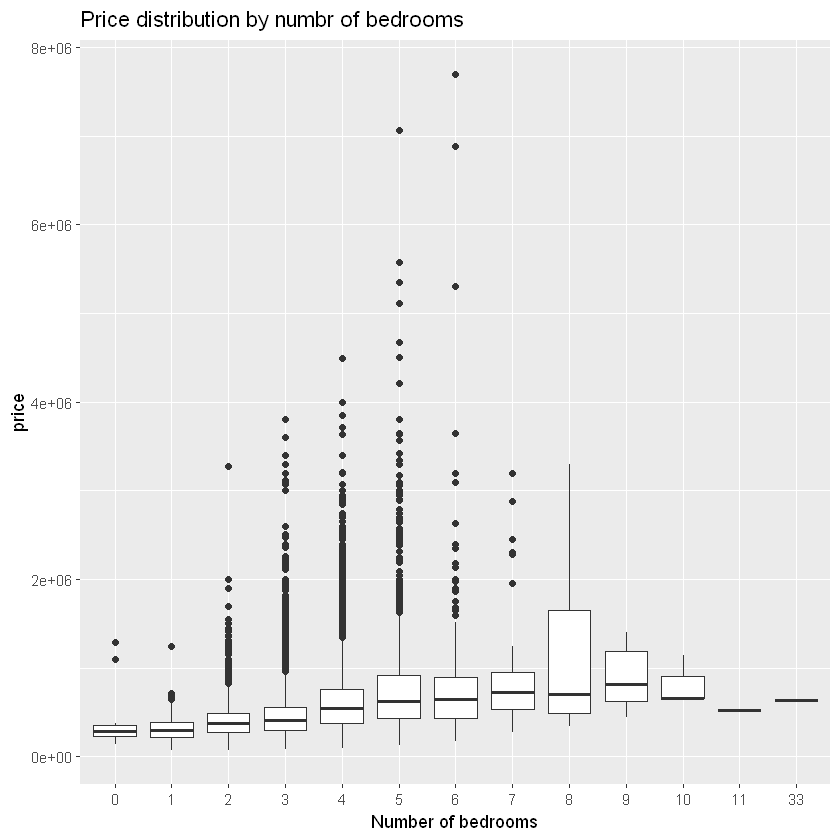

In [6]:
ggplot(sales_df,aes(x=as.factor(bedrooms),y=price))+
    geom_boxplot()+
    ggtitle("Price distribution by numbr of bedrooms")+
    xlab("Number of bedrooms")+
    ylab("price")

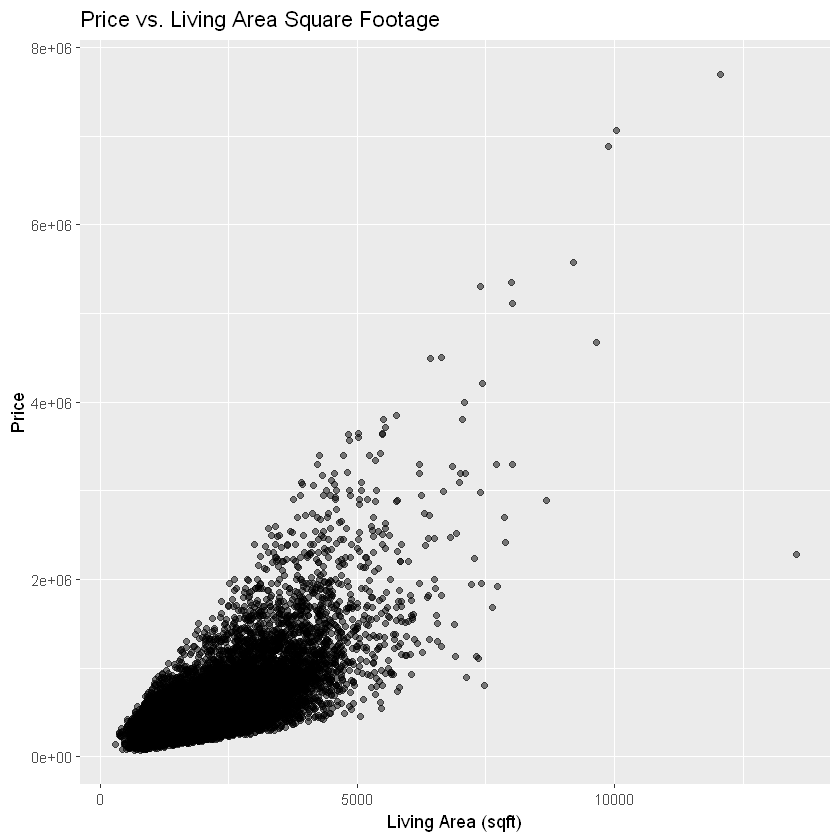

In [7]:
# Scatter plot of Price vs. Square Footage
ggplot(sales_df, aes(x = sqft_living, y = price)) +
    geom_point(alpha = 0.5) +
    ggtitle("Price vs. Living Area Square Footage") +
    xlab("Living Area (sqft)") +
    ylab("Price")


Warning message:
"package 'corrplot' was built under R version 4.3.3"
corrplot 0.92 loaded



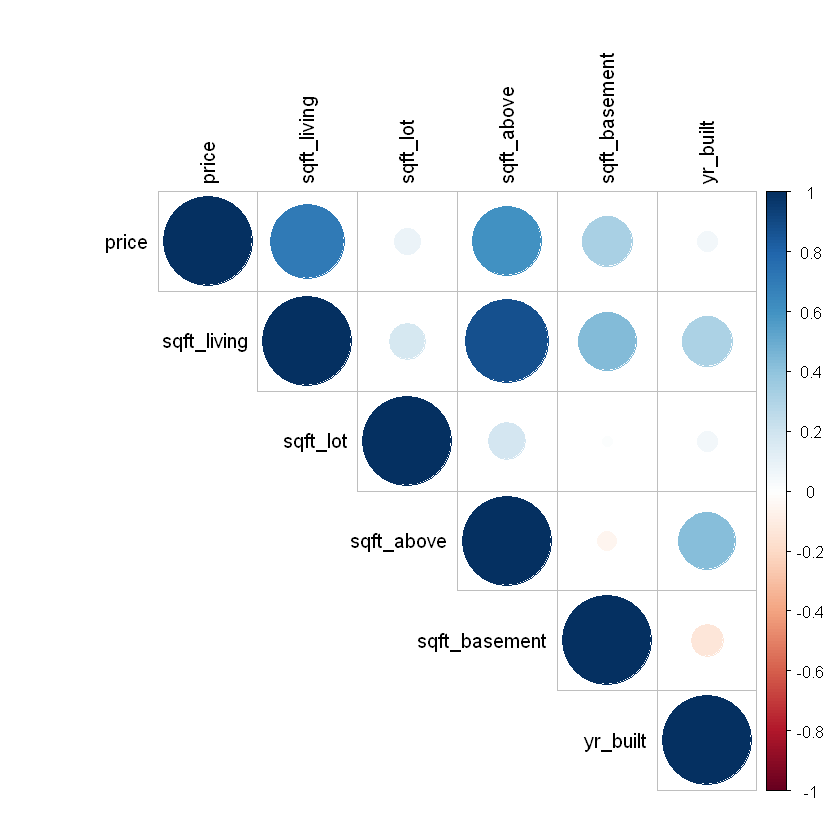

In [8]:
# Calculate correlations
library(corrplot)
numerical_data <- sales_df %>% select(price, sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built)
cor_matrix <- cor(numerical_data)

corrplot(cor_matrix, method = "circle", type = "upper", tl.col = "black")


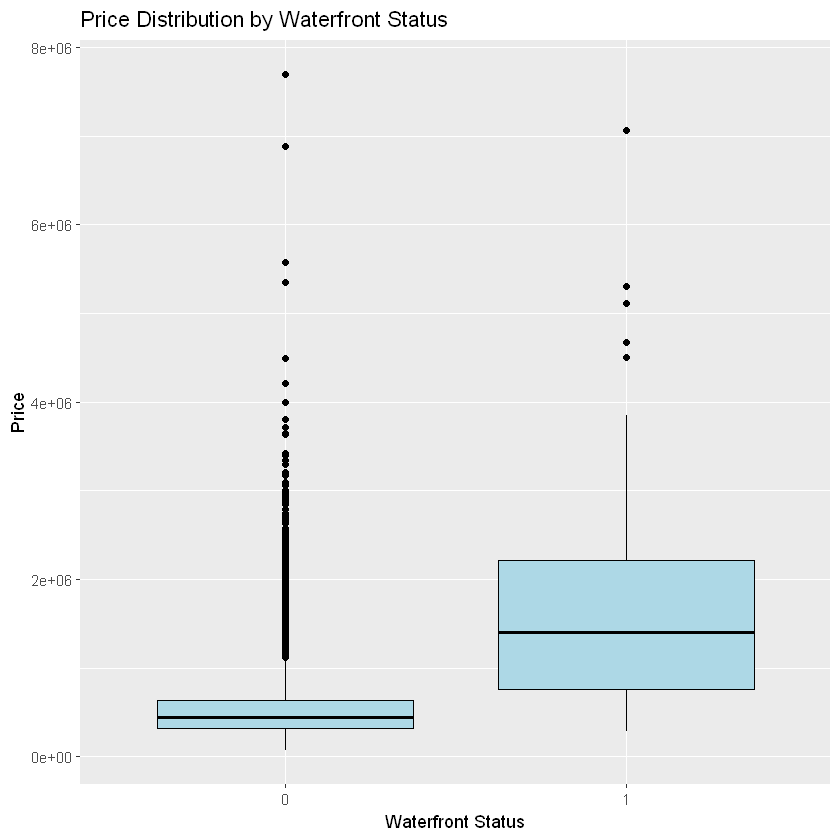

In [9]:
ggplot(sales_df, aes(x = as.factor(waterfront), y = price)) +
    geom_boxplot(fill = "lightblue", color = "black") +
    ggtitle("Price Distribution by Waterfront Status") +
    xlab("Waterfront Status") +
    ylab("Price")


In [10]:
# cleaning

In [11]:
#missing Values
print(colSums(is.na(sales_df)))
# no missing values

           id          date         price      bedrooms     bathrooms 
            0             0             0             0             0 
  sqft_living      sqft_lot        floors    waterfront          view 
            0             0             0             0             0 
    condition         grade    sqft_above sqft_basement      yr_built 
            0             0             0             0             0 
 yr_renovated       zipcode           lat          long sqft_living15 
            0             0             0             0             0 
   sqft_lot15 
            0 


In [12]:
# Removing the variables as they are not usefull
sales_df <- subset(sales_df, select = -c(id, zipcode, lat, long))


In [13]:
dup_rows <- duplicated(sales_df)
num_dup_rows <- sum(dup_rows)

print(paste("Number of duplicate rows:", num_dup_rows))

[1] "Number of duplicate rows: 0"


In [14]:
year <- substr(sales_df$date, 1, 4)
month <- substr(sales_df$date, 5, 6)
day <- substr(sales_df$date, 7, 8)

sales_df$date <- paste(year, month, day, sep = "-")
sales_df$date <- as.Date(sales_df$date)
# converting to proper date format

In [15]:
# Removing outliers of Price
Q1 <- quantile(sales_df$price, 0.25)
Q3 <- quantile(sales_df$price, 0.75)
IQR <- Q3 - Q1

lower_bound <- Q1 - 1.5 * IQR
upper_bound <- Q3 + 1.5 * IQR

sales_df_clean <- sales_df[sales_df$price >= lower_bound & sales_df$price <= upper_bound, ]

num_outliers_removed <- nrow(sales_df) - nrow(sales_df_clean)
print(paste("Number of outliers removed:", num_outliers_removed))


[1] "Number of outliers removed: 1146"


In [16]:
# Removing ouliers in bedrooms
Q1_bed<- quantile(sales_df$bedrooms, 0.25)
Q3_bed<- quantile(sales_df$bedrooms, 0.75)
IQR_bed<- Q3_bed-Q1_bed

lower_bound<- Q1_bed - 1.5 *IQR_bed
upper_bound<- Q3_bed + 1.5 *IQR_bed

sales_df_clean <- sales_df[sales_df$bedrooms >= lower_bound & sales_df$bedrooms <= upper_bound, ]

outliers<- nrow(sales_df) - nrow(sales_df_clean)
print(paste("Number of outliers removed for bedrooms:",outliers))


[1] "Number of outliers removed for bedrooms: 546"


In [17]:
# removing ouliers in bathrooms
Q1_bath<- quantile(sales_df$bathrooms, 0.10)
Q3_bath<- quantile(sales_df$bathrooms, 0.90)
IQR_bath<- Q3_bath-Q1_bath


lower_bound<- Q1_bath - 1.5 * IQR_bath
upper_bound<- Q3_bath + 1.5 * IQR_bath

sales_df_clean <- sales_df[sales_df$bathrooms >=lower_bound & sales_df$bathrooms<= upper_bound, ]


outliers<- nrow(sales_df) - nrow(sales_df_clean)
print(paste("Number of outliers removed for bathrooms:",outliers))


[1] "Number of outliers removed for bathrooms: 10"


In [18]:
# removing outliers in 'sqft_living'
Q1<- quantile(sales_df$sqft_living, 0.25)
Q3<- quantile(sales_df$sqft_living, 0.75)
IQR<- Q3- Q1

lower_bound<- Q1- 1.5 * IQR
upper_bound<- Q3+ 1.5 * IQR

sales_df_clean <- sales_df[sales_df$sqft_living >= lower_bound & sales_df$sqft_living <= upper_bound, ]
num_outliers<- nrow(sales_df) - nrow(sales_df_clean)
print(paste("Number of outliers removed for sqft_living:", num_outliers))


[1] "Number of outliers removed for sqft_living: 572"


In [19]:
# outliers in sqft_lot
Q1_sqft_lot <- quantile(sales_df$sqft_lot, 0.20)
Q3_sqft_lot <- quantile(sales_df$sqft_lot, 0.80)
IQR_sqft_lot<-Q3_sqft_lot - Q1_sqft_lot


lower_bound<- Q1_sqft_lot - 1.5 * IQR_sqft_lot
upper_bound<- Q3_sqft_lot + 1.5 * IQR_sqft_lot


sales_df_clean <- sales_df[sales_df$sqft_lot >=lower_bound & sales_df$sqft_lot <=upper_bound, ]
outliers<- nrow(sales_df) - nrow(sales_df_clean)
print(paste("Number of outliers removed for sqft_lot:",outliers))


[1] "Number of outliers removed for sqft_lot: 1993"


In [20]:
# Floors
corr<- cor(sales_df_clean[c("floors", "price")])
print(corr)


          floors     price
floors 1.0000000 0.2564911
price  0.2564911 1.0000000


In [21]:
# Waterfront
unq<- unique(sales_df_clean$waterfront)
print(paste("Unique values in 'waterfront' column:", unq))

if (setequal(unq, c(0, 1))) {
  print("The 'waterfront' column is correct.")
} else {
  sales_df_clean$waterfront <- ifelse(sales_df_clean$waterfront == 1, 1, 0)
  print("The 'weaterfront' column has corrected.")
}


[1] "Unique values in 'waterfront' column: 0"
[2] "Unique values in 'waterfront' column: 1"
[1] "The 'waterfront' column is correct."


In [22]:
# grade variable
sales_df_clean$Grade <- factor(sales_df_clean$grade)


In [23]:

sales_df_clean$has_basement <- as.integer(sales_df_clean$sqft_basement > 0)


In [24]:
current_year <- as.numeric(format(Sys.Date(), "%Y"))

sales_df_clean$house_age <- current_year - sales_df_clean$yr_built
sales_df_clean <- subset(sales_df_clean, select = -c(yr_built))


In [25]:
# Renovated

sales_df_clean$renovated <- ifelse(sales_df_clean$yr_renovated > 0, 1, 0)
sales_df_clean$years_since_renovation <- current_year - sales_df_clean$yr_renovated


In [26]:
# outliers in sqft_living15
Q1<- quantile(sales_df$sqft_living15, 0.25)
Q3<- quantile(sales_df$sqft_living15, 0.75)
IQR<- Q3- Q1

lower_bound<- Q1- 1.5 * IQR
upper_bound<- Q3+ 1.5 * IQR

sales_df_clean <- sales_df[sales_df$sqft_living15 >= lower_bound & sales_df$sqft_living15 <= upper_bound, ]

num_outliers<- nrow(sales_df) - nrow(sales_df_clean)
print(paste("Number of outliers removed for sqft_living15:", num_outliers))


[1] "Number of outliers removed for sqft_living15: 544"


In [27]:
# ouliers in sqft_lot15
Q1<- quantile(sales_df$sqft_lot15, 0.25)
Q3<- quantile(sales_df$sqft_lot15, 0.75)
IQR<- Q3 -Q1

lower_bound_sqft_lot15 <- Q1- 1.5 *IQR
upper_bound_sqft_lot15 <- Q3+ 1.5 *IQR

sales_df_clean <- sales_df[sales_df$sqft_lot15 >= lower_bound_sqft_lot15 & sales_df$sqft_lot15 <= upper_bound_sqft_lot15, ]
outliers<- nrow(sales_df) - nrow(sales_df_clean)
print(paste("Number of outliers removed for sqft_lot15:",outliers))


[1] "Number of outliers removed for sqft_lot15: 2194"


In [28]:
head(sales_df_clean$sqft_lot15)

[1] 5650 7639 8062 5000 7503 6819

In [29]:
# modifying the date column
library(lubridate)

sales_df_clean$year <- year(sales_df_clean$date)
sales_df_clean$month <- month(sales_df_clean$date)
sales_df_clean$day <- day(sales_df_clean$date)

sales_df_clean$date <- NULL


In [30]:
# Creating a new preprocessed file
write.csv(sales_df_clean, file = "R_preprocessed_kc_house_data.csv", row.names = FALSE)

In [31]:
head(sales_df_clean)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,year,month,day
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
1,221900,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,1340,5650,2014,10,13
2,538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,1690,7639,2014,12,9
3,180000,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,2720,8062,2015,2,25
4,604000,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,1360,5000,2014,12,9
5,510000,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,1800,7503,2015,2,18
7,257500,3,2.25,1715,6819,2,0,0,3,7,1715,0,1995,0,2238,6819,2014,6,27


In [32]:
install.packages("caret")
install.packages("randomForest")
library(caret)
library(randomForest)


set.seed(42)

X <- sales_df_clean[, !names(sales_df_clean) %in% "price"]
y <- sales_df_clean$price

train_index <- createDataPartition(y, p = 0.7, list = FALSE)
X_train <- X[train_index, ]
X_test <- X[-train_index, ]
y_train <- y[train_index]
y_test <- y[-train_index]

Warning message:
"package 'caret' is in use and will not be installed"
Warning message:
"package 'randomForest' is in use and will not be installed"


In [33]:

install.packages("randomForest")
library(randomForest)

set.seed(42)
rf_regressor <- randomForest(X_train, y_train, ntree = 100)
print(rf_regressor)


Warning message:
"package 'randomForest' is in use and will not be installed"



Call:
 randomForest(x = X_train, y = y_train, ntree = 100) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 6

          Mean of squared residuals: 29005124267
                    % Var explained: 72.5


In [34]:
predictions <- predict(rf_regressor, X_test)

mse <- mean((predictions - y_test)^2)
r_squared <- 1 - sum((y_test - predictions)^2) / sum((y_test - mean(y_test))^2)

print(paste("Mean Squared Error:", mse))
print(paste("R-squared:", r_squared))


[1] "Mean Squared Error: 28970055768.2502"
[1] "R-squared: 0.737771441192201"


In [35]:
library(Metrics)

#  RMSE
rmse<- sqrt(mse)
#  MAE
mae<- mae(y_test,predictions)

print(paste("Root Mean Squared Error (RMSE):", rmse))
print(paste("Mean Absolute Error (MAE):", mae))

Warning message:
"package 'Metrics' was built under R version 4.3.3"

Attaching package: 'Metrics'


The following objects are masked from 'package:caret':

    precision, recall




[1] "Root Mean Squared Error (RMSE): 170205.921660353"
[1] "Mean Absolute Error (MAE): 109486.155730491"


Warning message:
"package 'ggplot2' is in use and will not be installed"


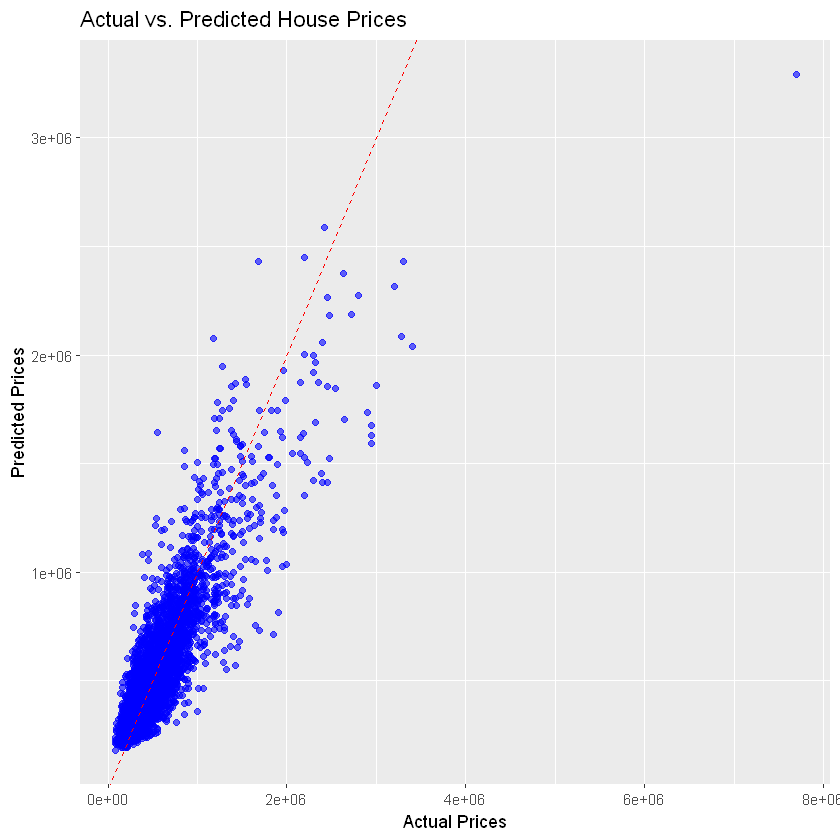

In [36]:
install.packages("ggplot2")
library(ggplot2)

plot_data <- data.frame(Actual_Prices = y_test, Predicted_Prices = predictions)

scatter_plot <- ggplot(plot_data, aes(x = Actual_Prices, y = Predicted_Prices)) +
                geom_point(alpha = 0.6,color='blue') +
                geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +
                labs(x = "Actual Prices", y = "Predicted Prices", title = "Actual vs. Predicted House Prices")

print(scatter_plot)


In [37]:
y_train_pred <- predict(rf_regressor, X_train)

y_test_pred <- predict(rf_regressor, X_test)


Installing package into 'C:/Users/tenyj/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\tenyj\AppData\Local\Temp\RtmpQhiEAo\downloaded_packages


Warning message:
"package 'gridExtra' was built under R version 4.3.3"

Attaching package: 'gridExtra'


The following object is masked from 'package:randomForest':

    combine


The following object is masked from 'package:dplyr':

    combine




TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]


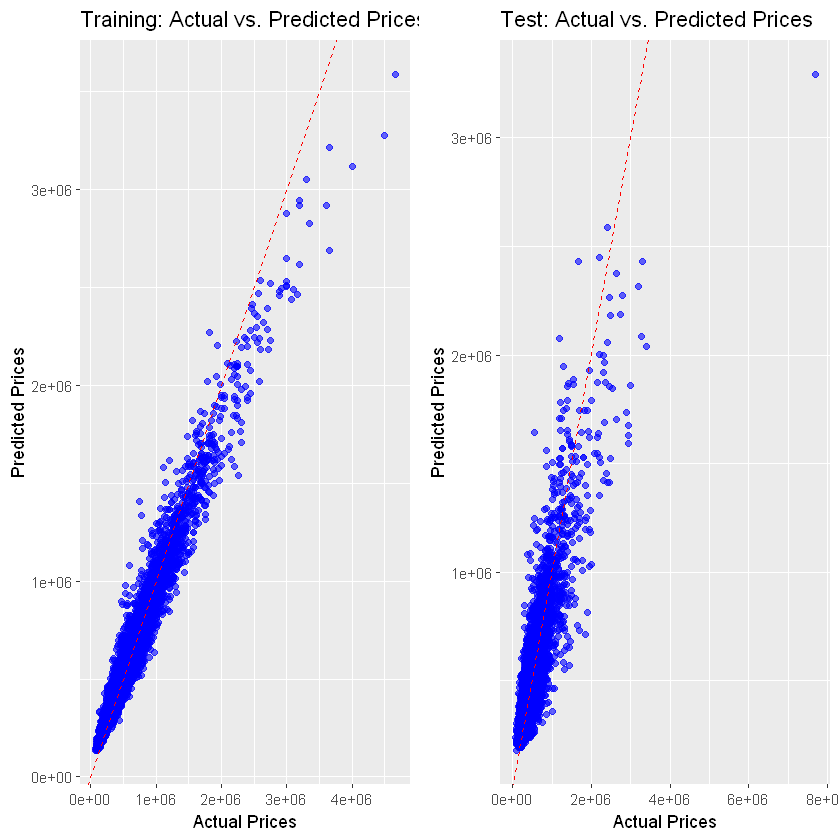

In [38]:
install.packages("gridExtra")
library(gridExtra)

train_plot_data <- data.frame(Actual_Prices = y_train, Predicted_Prices = y_train_pred)

test_plot_data <- data.frame(Actual_Prices = y_test, Predicted_Prices = y_test_pred)

train_plot <- ggplot(train_plot_data, aes(x = Actual_Prices, y = Predicted_Prices)) +
              geom_point(alpha = 0.6,color='blue') +
              geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +
              labs(title = "Training: Actual vs. Predicted Prices", x = "Actual Prices", y = "Predicted Prices")

test_plot <- ggplot(test_plot_data, aes(x = Actual_Prices, y = Predicted_Prices)) +
             geom_point(alpha = 0.6,color='blue') +
             geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +
             labs(title = "Test: Actual vs. Predicted Prices", x = "Actual Prices", y = "Predicted Prices")

multiplot <- grid.arrange(train_plot, test_plot, nrow = 1)
print(multiplot)
